In [25]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [26]:
#Data
print(os.getcwd())

data_link = os.getcwd() + "\\TBI\\TBI_data_2.csv"
print(data_link)

F:\CTSN_TBI\Machine_learning
F:\CTSN_TBI\Machine_learning\TBI\TBI_data_2.csv


In [27]:
df_tbi = pd.read_csv(data_link, delimiter = ",")
df_tbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   record_id                                     260 non-null    int64  
 1   age_at_record                                 259 non-null    float64
 2   sex                                           259 non-null    float64
 3   tbi_cli_reason                                259 non-null    float64
 4   tbi_cli_time_acci_hos                         240 non-null    float64
 5   tbi_cli_pulse                                 84 non-null     float64
 6   tbi_cli_temp                                  84 non-null     float64
 7   tbi_cli_blood_pressure                        83 non-null     float64
 8   tbi_cli_breathing_rate                        30 non-null     float64
 9   tbi_cli_glasgow                               260 non-null    int

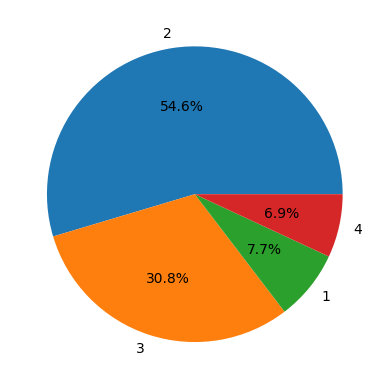

In [28]:
import matplotlib.pyplot as plt

# Rename the classes
# df_tbi['d_kl_tl'].replace({1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Very Severe'}, inplace=True)

temp = df_tbi['d_kl_tl'].value_counts()
plt.pie(temp.values, labels=temp.index.values,
        autopct='%1.1f%%')
# plt.title(r"Outcome Distribution", fontweight='bold')

# Save the image
plt.savefig('outcome_distribution.png')

plt.show()


## Data processing

### 4 class

In [29]:
selected_columns = ["tbi_cli_glasgow", "ethanol", "tbi_cli_breathing_rate", "tbi_ct_subdural_hematoma_position_proprotion", "tbi_ct_subdural_hematoma_position_value",
"tbi_ct_rotterdam", "tbi_ct_epidural_hematoma_value", "tbi_ct_subdural_hematoma_thick", "tbi_ct_cerebral_contusion_volume",
"age_at_record","tbi_cli_time_acci_hos", "tbi_ct_skull_risk", "tbi_ct_epidural_hematoma_volume", "tbi_cli_pulse",
"tbi_ct_skull_fracture_characteristic","tbi_ct_subarachnoid_characteristic","tbi_cli_hypertension","tbi_cli_temp"]  # Replace with the names of the columns you want to select
# Select the columns
df_final = df_tbi[selected_columns]
df_final.head()


,tbi_cli_glasgow,ethanol,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_subdural_hematoma_thick,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_time_acci_hos,tbi_ct_skull_risk,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_ct_skull_fracture_characteristic,tbi_ct_subarachnoid_characteristic,tbi_cli_hypertension,tbi_cli_temp
0,13,237.9,19.0,1.0,70.0,2.0,NaN,7.0,NaN,52.0,2.0,2.0,NaN,70.0,NaN,NaN,2.0,36.5
1,13,0.0,22.0,1.0,35.0,NaN,NaN,23.0,NaN,75.0,NaN,2.0,NaN,77.0,NaN,NaN,2.0,36.8
2,15,NaN,18.0,NaN,NaN,2.0,NaN,NaN,2.0,37.0,NaN,2.0,NaN,67.0,2.0,NaN,2.0,36.6
3,14,NaN,19.0,2.0,60.0,2.0,NaN,6.0,NaN,66.0,NaN,2.0,NaN,75.0,2.0,NaN,2.0,36.5
4,15,0.0,18.0,NaN,NaN,1.0,NaN,NaN,NaN,20.0,4.0,2.0,NaN,85.0,2.0,NaN,2.0,36.8


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = df_final
df_new_tbi_target = df_tbi['d_kl_tl']
df_new_array = scaler.fit_transform(df_sc)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.018599,1.855910,0.328322,-0.625543,0.543214,0.227946,NaN,-0.153532,NaN,0.402031,-0.194118,0.663325,NaN,-0.792786,NaN,NaN,0.200895,-0.795610
1,-0.018599,-0.725666,2.066500,-0.625543,-3.308037,NaN,NaN,2.097267,NaN,1.489632,NaN,0.663325,NaN,-0.134370,NaN,NaN,0.200895,0.442006
2,0.672219,NaN,-0.251070,NaN,NaN,0.227946,NaN,NaN,-0.505425,-0.307274,NaN,0.663325,NaN,-1.074964,0.582223,NaN,0.200895,-0.383072
3,0.326810,NaN,0.328322,1.598611,-0.557143,0.227946,NaN,-0.294207,NaN,1.064049,NaN,0.663325,NaN,-0.322489,0.582223,NaN,0.200895,-0.795610
4,0.672219,-0.725666,-0.251070,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.111153,-0.182502,0.663325,NaN,0.618104,0.582223,NaN,0.200895,0.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.016579,-0.194118,0.663325,NaN,NaN,0.582223,NaN,0.200895,NaN
256,-1.745643,1.059191,NaN,NaN,NaN,0.227946,NaN,NaN,NaN,-0.165413,-0.194118,-1.507557,NaN,NaN,0.582223,0.688247,0.200895,NaN
257,-0.018599,NaN,NaN,-0.625543,-1.657501,-1.020803,NaN,-0.575557,NaN,1.915215,8.157150,0.663325,NaN,NaN,NaN,NaN,0.200895,NaN
258,0.326810,NaN,NaN,1.598611,0.543214,0.227946,NaN,-0.997582,NaN,0.023735,-0.176695,0.663325,NaN,NaN,0.582223,-1.452966,0.200895,NaN


In [31]:
df_tbi_f.columns = df_final.columns.to_list()
df_tbi_f

,tbi_cli_glasgow,ethanol,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_subdural_hematoma_thick,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_time_acci_hos,tbi_ct_skull_risk,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_ct_skull_fracture_characteristic,tbi_ct_subarachnoid_characteristic,tbi_cli_hypertension,tbi_cli_temp
0,-0.018599,1.855910,0.328322,-0.625543,0.543214,0.227946,NaN,-0.153532,NaN,0.402031,-0.194118,0.663325,NaN,-0.792786,NaN,NaN,0.200895,-0.795610
1,-0.018599,-0.725666,2.066500,-0.625543,-3.308037,NaN,NaN,2.097267,NaN,1.489632,NaN,0.663325,NaN,-0.134370,NaN,NaN,0.200895,0.442006
2,0.672219,NaN,-0.251070,NaN,NaN,0.227946,NaN,NaN,-0.505425,-0.307274,NaN,0.663325,NaN,-1.074964,0.582223,NaN,0.200895,-0.383072
3,0.326810,NaN,0.328322,1.598611,-0.557143,0.227946,NaN,-0.294207,NaN,1.064049,NaN,0.663325,NaN,-0.322489,0.582223,NaN,0.200895,-0.795610
4,0.672219,-0.725666,-0.251070,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.111153,-0.182502,0.663325,NaN,0.618104,0.582223,NaN,0.200895,0.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.016579,-0.194118,0.663325,NaN,NaN,0.582223,NaN,0.200895,NaN
256,-1.745643,1.059191,NaN,NaN,NaN,0.227946,NaN,NaN,NaN,-0.165413,-0.194118,-1.507557,NaN,NaN,0.582223,0.688247,0.200895,NaN
257,-0.018599,NaN,NaN,-0.625543,-1.657501,-1.020803,NaN,-0.575557,NaN,1.915215,8.157150,0.663325,NaN,NaN,NaN,NaN,0.200895,NaN
258,0.326810,NaN,NaN,1.598611,0.543214,0.227946,NaN,-0.997582,NaN,0.023735,-0.176695,0.663325,NaN,NaN,0.582223,-1.452966,0.200895,NaN


In [32]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi_i = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tbi_cli_glasgow                               260 non-null    float64
 1   ethanol                                       260 non-null    float64
 2   tbi_cli_breathing_rate                        260 non-null    float64
 3   tbi_ct_subdural_hematoma_position_proprotion  260 non-null    float64
 4   tbi_ct_subdural_hematoma_position_value       260 non-null    float64
 5   tbi_ct_rotterdam                              260 non-null    float64
 6   tbi_ct_epidural_hematoma_value                260 non-null    float64
 7   tbi_ct_subdural_hematoma_thick                260 non-null    float64
 8   tbi_ct_cerebral_contusion_volume              260 non-null    float64
 9   age_at_record                                 260 non-null    flo

In [33]:
X= df_tbi_i
y = df_new_tbi_target

In [34]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [35]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

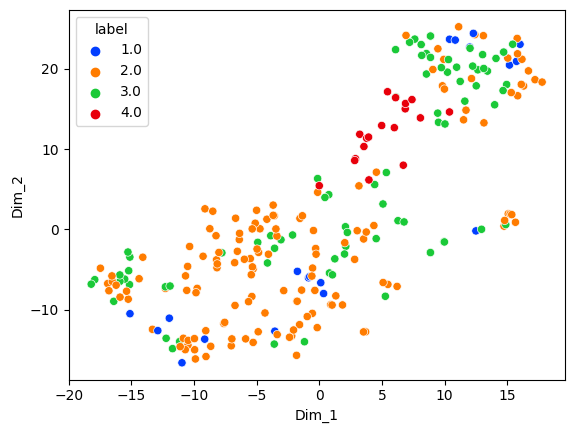

In [37]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity=25, random_state = 0)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()


## Correlation

In [38]:
selected_c = ["tbi_cli_glasgow", "tbi_ct_rotterdam","d_kl_tl" ]  # Replace with the names of the columns you want to select
# Select the columns
df_final = df_tbi[selected_c]
df_final.head()

,tbi_cli_glasgow,tbi_ct_rotterdam,d_kl_tl
0,13,2.0,2
1,13,NaN,2
2,15,2.0,2
3,14,2.0,3
4,15,1.0,2


In [44]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot density for "tbi_cli_glasgow" column in blue
df_final["tbi_cli_glasgow"].plot(kind="density", color="blue", label="tbi_cli_glasgow", ax=ax)

# Plot density for "tbi_ct_rotterdam" column in orange
df_final["tbi_ct_rotterdam"].plot(kind="density", color="orange", label="tbi_ct_rotterdam", ax=ax)

# Plot density for "d_kl_tl" column in green
df_final["d_kl_tl"].plot(kind="density", color="green", label="d_kl_tl", ax=ax)

# Add annotations
# For example, adding a legend
plt.legend()

# Save the combined plot as an image file
plt.savefig("density_plot.png")
plt.close()


<Axes: >

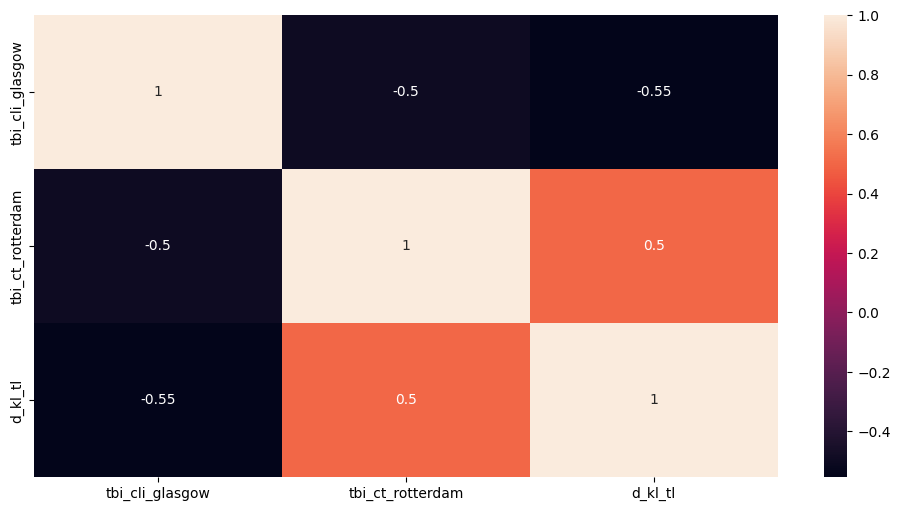

In [28]:
cor = df_final.corr()
plt.figure(figsize = (12,6))
sns.heatmap(cor, annot = True)

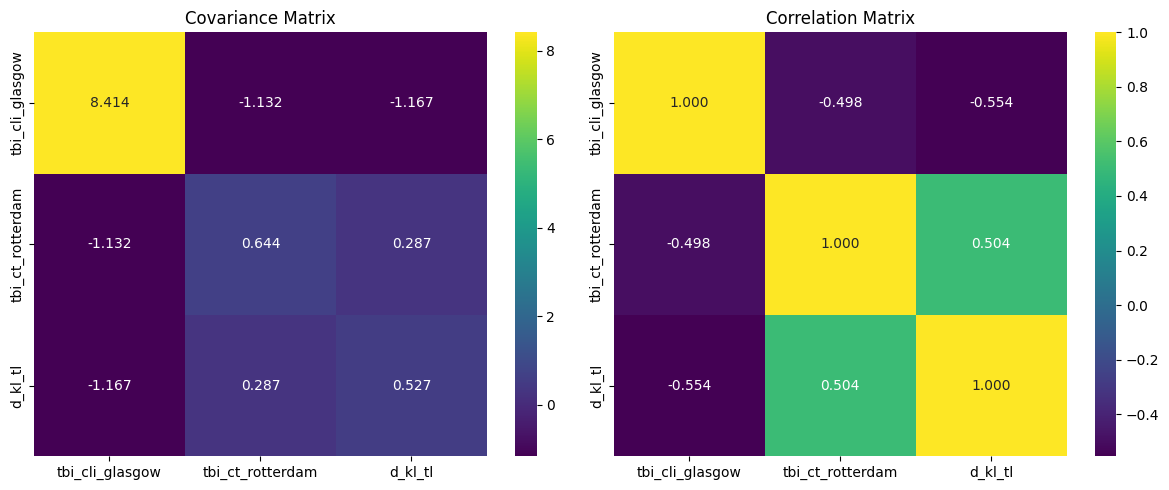

In [29]:
# Calculate covariance matrix
covariance_matrix = df_final.cov()

# Calculate correlation matrix
correlation_matrix = df_final.corr()

# Plot covariance matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(covariance_matrix, annot=True, cmap='viridis', fmt=".3f", xticklabels=selected_c, yticklabels=selected_c)
plt.title('Covariance Matrix')

# Plot correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".3f", xticklabels=selected_c, yticklabels=selected_c)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()